In [174]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

## Load data 

In [175]:
df = pd.read_csv("/kaggle/input/heart-disease-classification-dataset/heart disease classification dataset.csv")
df.shape # (rows, columns)

(303, 15)

In [33]:
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


In [176]:
df['sex'] = df['sex'].apply(lambda x: 0 if x == 'female' else 1)
df['target'] = df['target'].apply(lambda x: 1 if x == 'yes' else 0)

In [177]:
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
4,4,57,0,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,1


In [178]:
column_names = df.columns.tolist()
column_names

['Unnamed: 0',
 'age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [179]:
df.tail()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,298,57,0,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3,0
299,299,45,1,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3,0
300,300,68,1,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3,0
301,301,57,1,0,NaN,131.0,0,1,115.0,1,1.2,1,1,3,0
302,302,57,0,1,130.0,236.0,0,0,174.0,0,0.0,1,1,2,0


In [180]:
# Let's find out how many of each class there
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

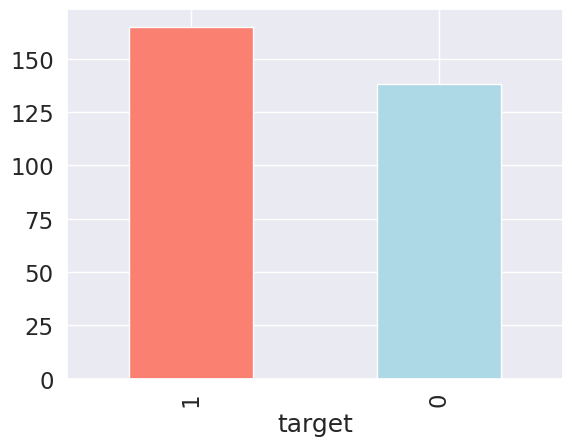

In [181]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    int64  
 3   cp          303 non-null    int64  
 4   trestbps    299 non-null    float64
 5   chol        302 non-null    float64
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     298 non-null    float64
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    int64  
 13  thal        303 non-null    int64  
 14  target      303 non-null    int64  
dtypes: float64(4), int64(11)
memory usage: 35.6 KB


In [183]:
# Are there any missing values?
df.isna().sum()

Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      4
chol          1
fbs           0
restecg       0
thalach       5
exang         0
oldpeak       0
slope         0
ca            0
thal          0
target        0
dtype: int64

In [184]:
df.describe()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,299.000000,302.000000,303.000000,303.000000,298.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,151.000000,54.366337,0.683168,0.966997,131.712375,246.317881,0.148515,0.528053,149.865772,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,87.612784,9.082101,0.466011,1.032052,17.629032,51.908285,0.356198,0.525860,22.563687,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,0.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.500000,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,151.000000,55.000000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,226.500000,61.000000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,302.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex 

In [185]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [186]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


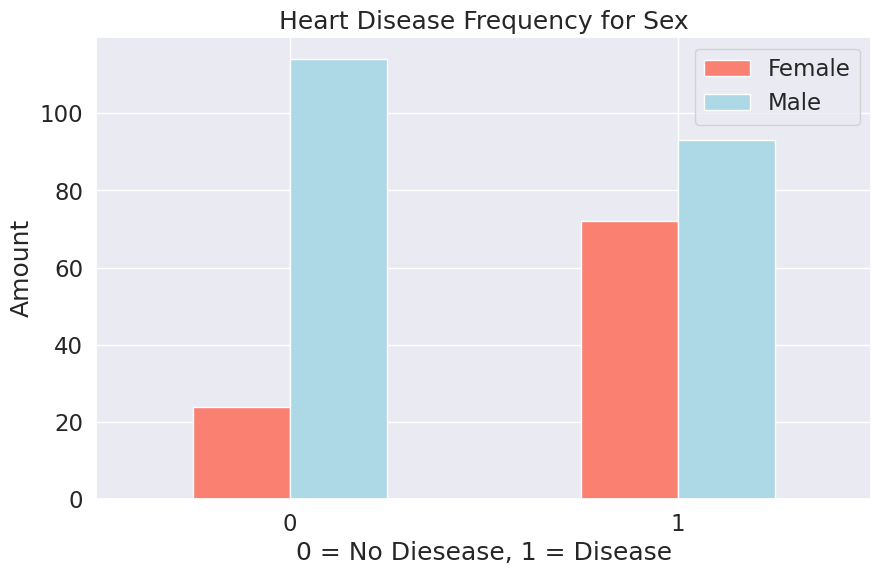

In [187]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

### Age vs. Max Heart Rate for Heart Disease

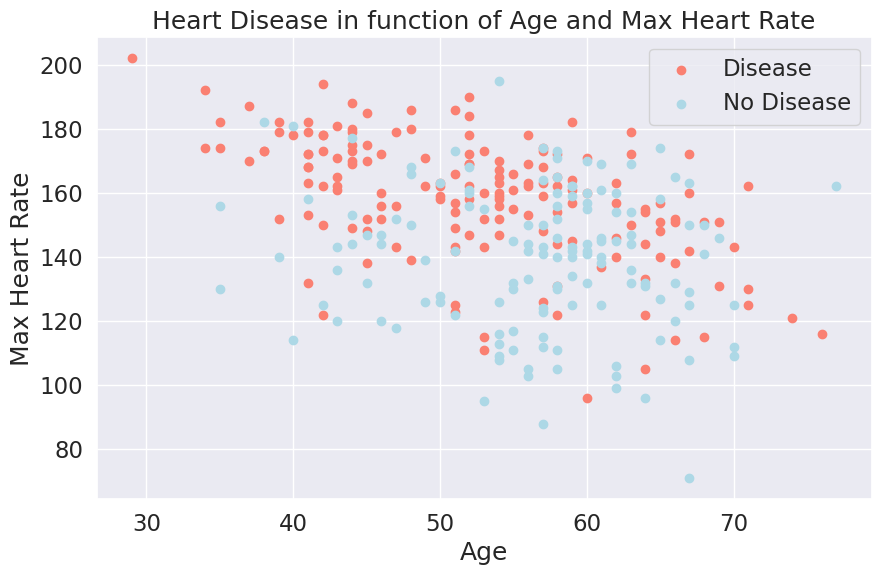

In [188]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with postivie examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

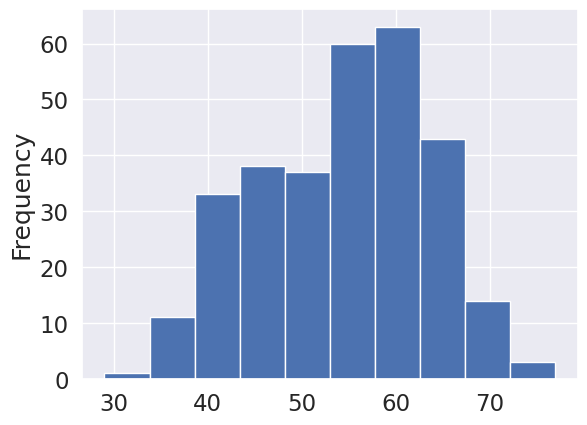

In [189]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

In [190]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


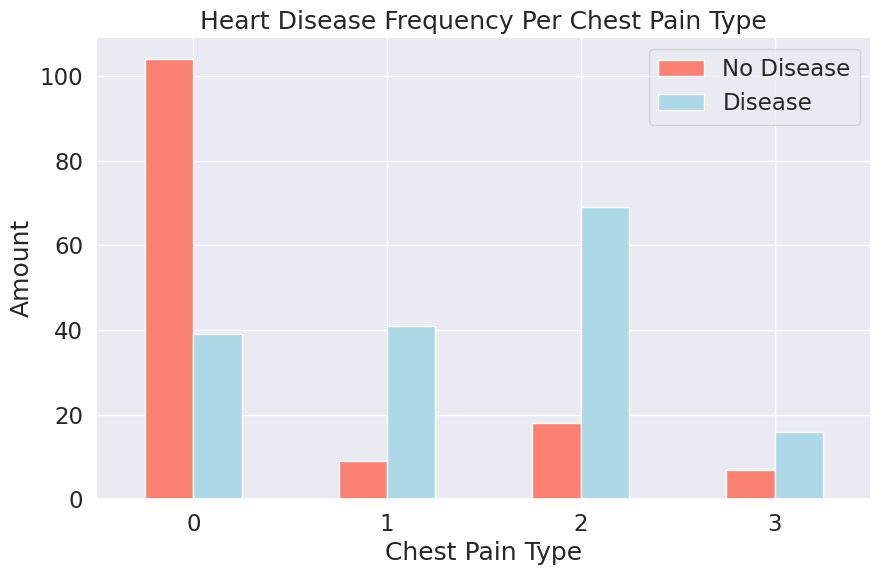

In [191]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"])

# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [192]:
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
4,4,57,0,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,1


In [193]:
df.corr()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
Unnamed: 0,1.000000,0.185153,0.201132,-0.399163,0.103337,0.021627,0.000743,-0.021130,-0.393974,0.363788,0.298161,-0.276484,0.384962,0.257403,-0.862585
age,0.185153,1.000000,-0.098447,-0.068653,0.279570,0.213465,0.121308,-0.116211,-0.396302,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,0.201132,-0.098447,1.000000,-0.049353,-0.064347,-0.197387,0.045032,-0.058196,-0.051491,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.399163,-0.068653,-0.049353,1.000000,0.048142,-0.078008,0.094444,0.044421,0.301567,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.103337,0.279570,-0.064347,0.048142,1.000000,0.127278,0.175885,-0.110966,-0.029729,0.070183,0.193827,-0.121380,0.098499,0.060437,-0.142035
chol,0.021627,0.213465,-0.197387,-0.078008,0.127278,1.000000,0.012865,-0.150330,-0.022939,0.066362,0.053098,-0.003027,0.070807,0.098328,-0.086563
fbs,0.000743,0.121308,0.045032,0.094444,0.175885,0.012865,1.000000,-0.084189,0.001599,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.021130,-0.116211,-0.058196,0.044421,-0.110966,-0.150330,-0.084189,1.000000,0.037393,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.393974,-0.396302,-0.051491,0.301567,-0.029729,-0.022939,0.001599,0.037393,1.000000,-0.396211,-0.346806,0.380764,-0.208967,-0.106621,0.413252
exang,0.363788,0.096801,0.141664,-0.394280,0.070183,0.066362,0.025665,-0.070733,-0.396211,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757


(15.5, -0.5)

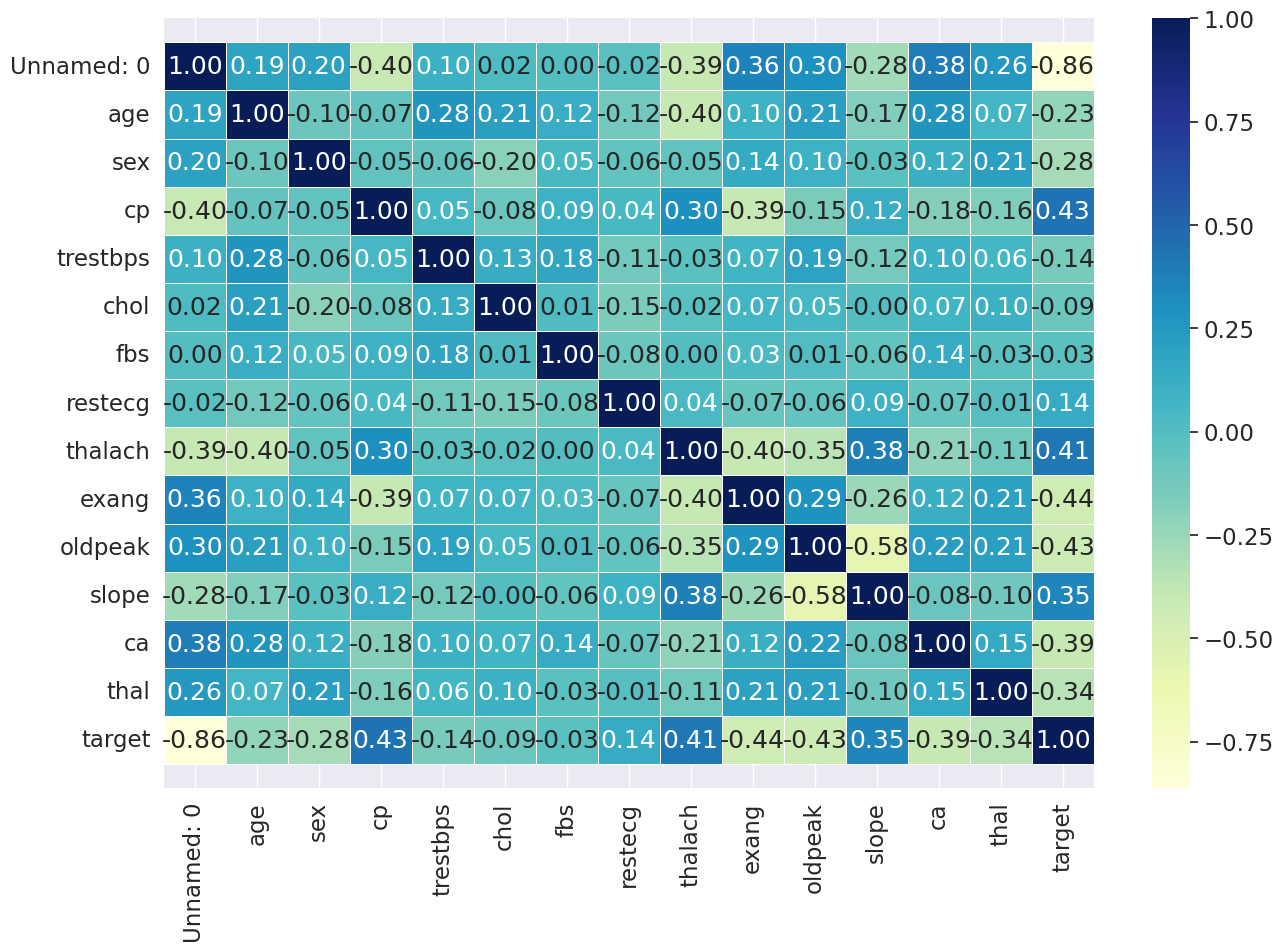

In [194]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## 5. Modelling 

In [195]:
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
4,4,57,0,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,1


In [196]:
# Split data into X and y
X = df.drop("target", axis=1)

y = df["target"]

In [197]:
X.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1
1,1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2
2,2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2
3,3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2
4,4,57,0,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2


In [198]:
X.isna().sum()

Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      4
chol          1
fbs           0
restecg       0
thalach       5
exang         0
oldpeak       0
slope         0
ca            0
thal          0
dtype: int64

In [199]:
X['chol'] = df['chol'].fillna(df['chol'].mean())
X['trestbps'] = df['trestbps'].fillna(df['trestbps'].mean())
X['thalach'] = df['thalach'].fillna(df['thalach'].mean())


In [200]:
X.isna().sum()

Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
dtype: int64

In [201]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [202]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [203]:
X_train

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,132,42,1,1,120.0,295.0,0,1,162.0,0,0.0,2,0,2
202,202,58,1,0,150.0,270.0,0,0,111.0,1,0.8,2,0,3
196,196,46,1,2,150.0,231.0,0,1,147.0,0,3.6,1,0,2
75,75,55,0,1,135.0,250.0,0,0,161.0,0,1.4,1,0,2
176,176,60,1,0,117.0,230.0,1,1,160.0,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,188,50,1,2,140.0,233.0,0,1,163.0,0,0.6,1,1,3
71,71,51,1,2,94.0,227.0,0,1,154.0,1,0.0,2,1,3
106,106,69,1,3,160.0,234.0,1,0,131.0,0,0.1,1,1,2
270,270,46,1,0,120.0,249.0,0,0,144.0,0,0.8,2,0,3


In [204]:
X_train.isna().sum()

Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
dtype: int64

In [205]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:
1. Logistic Regression 
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [206]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [207]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 1.0, 'KNN': 1.0, 'Random Forest': 1.0}

### Model Comparison

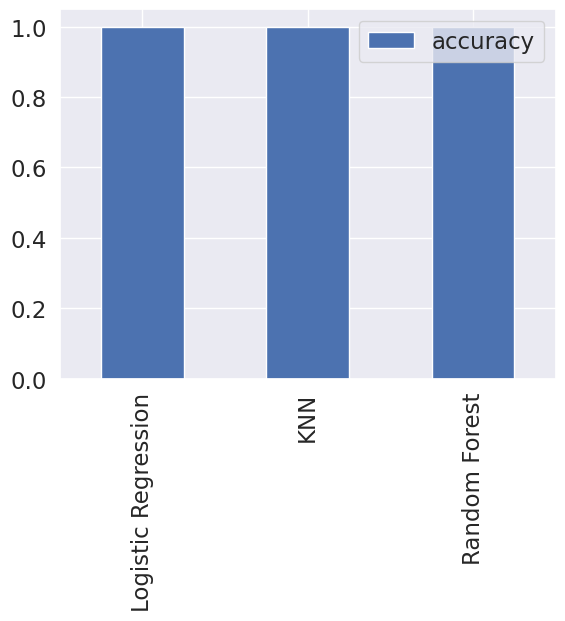

In [208]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();



## Let's look at the following:
* Hypyterparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning (by hand)

In [209]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [210]:
train_scores

[1.0,
 0.9793388429752066,
 0.9958677685950413,
 0.9917355371900827,
 0.9917355371900827,
 0.9958677685950413,
 0.9917355371900827,
 0.9917355371900827,
 0.9958677685950413,
 0.9917355371900827,
 0.9834710743801653,
 0.9834710743801653,
 0.9793388429752066,
 0.9834710743801653,
 0.9834710743801653,
 0.987603305785124,
 0.987603305785124,
 0.9917355371900827,
 0.987603305785124,
 0.987603305785124]

In [211]:
test_scores

[1.0,
 0.9836065573770492,
 1.0,
 1.0,
 1.0,
 0.9836065573770492,
 0.9672131147540983,
 0.9836065573770492,
 0.9836065573770492,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9836065573770492,
 0.9836065573770492,
 0.9836065573770492,
 0.9836065573770492]

Maximum KNN score on the test data: 100.00%


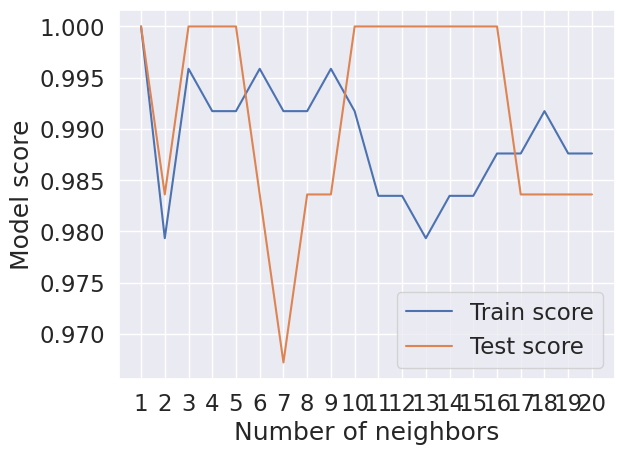

In [212]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV
* LogisticRegression()
* RandomForestClassifier()


In [213]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV...

In [214]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [215]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 29.763514416313132}

In [216]:
rs_log_reg.score(X_test, y_test)

1.0

Now we've tuned LogisticRegression(), let's do the same for RandomForestClassifier()...

In [217]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [218]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 560,
 'min_samples_split': 16,
 'min_samples_leaf': 17,
 'max_depth': 5}

In [219]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

1.0

## Hyperparamter Tuning with GridSearchCV



In [220]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [221]:
# Check the best hyperparmaters
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [222]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

1.0

## Evaluting our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score


In [223]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [224]:
y_preds

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [225]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [227]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[29  0]
 [ 0 32]]


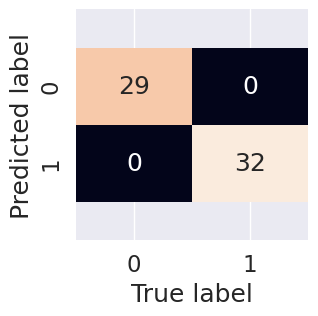

In [228]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)

In [229]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        32

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61



### Calculate evaluation metrics using cross-validation


In [230]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [231]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [232]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.85245902, 1.        , 1.        , 1.        , 0.71666667])

In [233]:
cv_acc = np.mean(cv_acc)
cv_acc

0.9138251366120219

In [234]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.9571428571428571

In [235]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.8969696969696969

In [236]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.9066122448979591

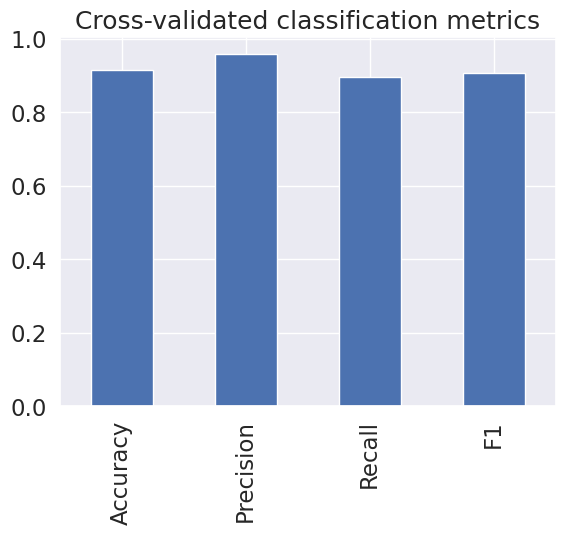

In [237]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

In [238]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [239]:
# Check coef_
clf.coef_

array([[-0.31657541,  0.2197394 , -0.03799284,  0.07434395,  0.16432656,
        -0.02594345, -0.02974856,  0.31308708,  0.16308078, -0.05240577,
        -0.68458934,  0.20791744, -0.13472756, -0.05683528]])

In [240]:
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
4,4,57,0,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,1


In [241]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'Unnamed: 0': -0.3165754074185207,
 'age': 0.21973940217478988,
 'sex': -0.037992843592773065,
 'cp': 0.07434394853081329,
 'trestbps': 0.1643265603167477,
 'chol': -0.02594344769050511,
 'fbs': -0.029748564236821085,
 'restecg': 0.3130870770874217,
 'thalach': 0.16308077667285634,
 'exang': -0.05240576502295401,
 'oldpeak': -0.6845893433583121,
 'slope': 0.20791744130582746,
 'ca': -0.1347275575161972,
 'thal': -0.05683528089104162}

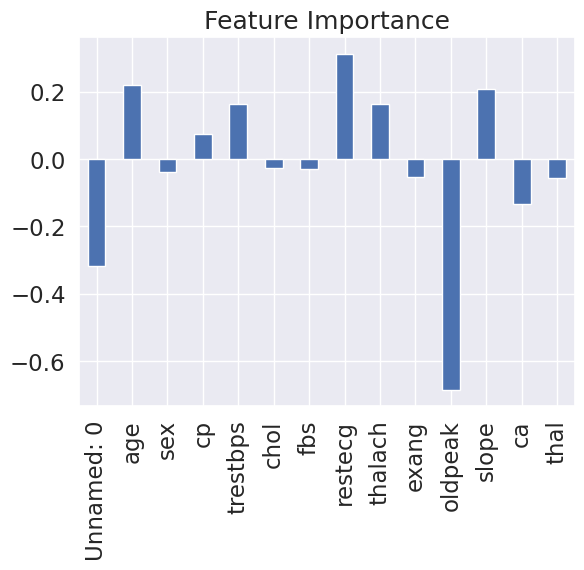

In [242]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [243]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [244]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107
